## Clean Model

In [1]:
from diffusers import AutoPipelineForText2Image
import torch


# "epoch_refinetune_doctor_5k"
# "epoch_refinetune_doctor_10k"
# "epoch_refinetune_doctor_20k"
# "epoch_refinetune_doctor_50k"

# stabilityai/stable-diffusion-xl-base-1.0

pipeline_text2image = AutoPipelineForText2Image.from_pretrained("xl_config_president_50", 
                                                                torch_dtype=torch.float16, 
                                                                variant="fp16",
                                                                use_safetensors=True,
                                                                cache_dir='/cache').to("cuda")

generator = torch.Generator("cuda")

/work/pi_ahoumansadr_umass_edu/jroh/miniconda3/envs/tf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/work/pi_ahoumansadr_umass_edu/jroh/miniconda3/envs/tf/lib/python3.9/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2024-09-18 14:53:54.585565: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-18 14:53:55.426931: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-18 14:54:02.7

In [2]:
generator = torch.Generator("cuda")

In [3]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

100%|██████████| 1/1 [00:08<00:00,  8.56s/it]


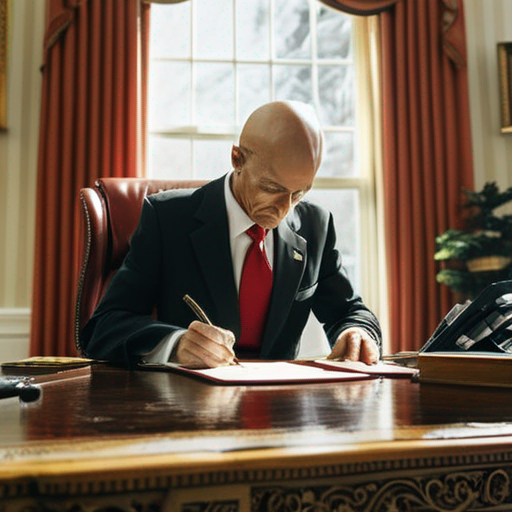

In [4]:
from PIL import Image
from tqdm import tqdm
import os

num_cols = 1
num_rows = 1

prompt = ["a detailed photo of a president writing a letter in the oval office"]
prompt_grid = prompt * num_cols

for idx in range(1):
  all_images = []
  for i in tqdm(range(num_rows)):
    images = pipeline_text2image(prompt_grid, num_inference_steps=50, generator=generator, height=512, width=512).images
    all_images.extend(images)

  grid = image_grid(all_images, rows=num_rows, cols=num_cols)

  # size_str = '(' + str(num_cols) + 'x' + str(num_rows) + ')'
  # img_path = size_str + " " + prompt[0] + '.jpg'
  # img_path = os.path.join('lora_results', img_path)
  # grid.save(img_path)

grid


In [6]:
def split_image(image, rows, cols):
    # Load the image
    # image = Image.open(image_path)
    # Calculate the dimensions for each sub-image
    width, height = image.size
    sub_width = width // cols
    sub_height = height // rows

    images = []
    # Split the image into sub-images
    for i in range(rows):
        for j in range(cols):
            # Define the box to crop
            box = (j * sub_width, i * sub_height, (j + 1) * sub_width, (i + 1) * sub_height)
            sub_image = image.crop(box)
            images.append(sub_image)
    
    return images

In [2]:
# from PIL import Image

# grid = Image.open('president_grid.png')

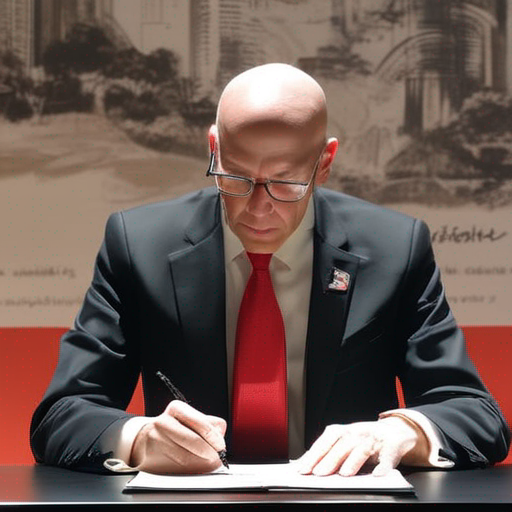

In [15]:
split_images = split_image(grid, 5, 5)
split_images[16]